In [265]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
 
import warnings
warnings.filterwarnings("ignore")

In [226]:
data = pd.read_csv("water_potability.csv")

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [228]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [229]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [230]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [231]:
data.duplicated().sum()

0

Text(0, 0.5, 'Percentage of Missing Values')

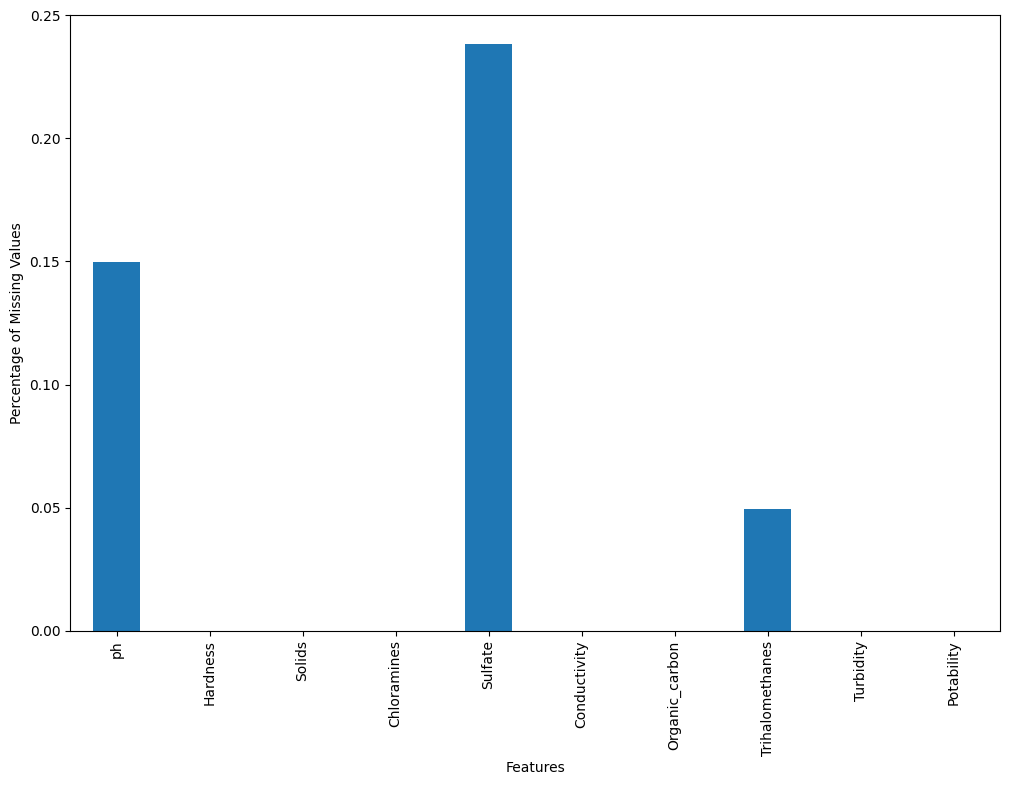

In [232]:
data.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")

handle missing value 

In [233]:

data['ph'].fillna(data['ph'].mean(), inplace=True)


In [234]:

imputer = KNNImputer(n_neighbors=5)
data[['Sulfate']] = imputer.fit_transform(data[['Sulfate']])


In [235]:
# Mean Imputation
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)


In [236]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [237]:
# Save to a CSV file
data.to_csv('cleaned_water_data.csv', index=False)


In [238]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [239]:
# Example: Remove rows with z-score > 3
z_scores = data.apply(zscore)
data = data[(z_scores < 3).all(axis=1)]

In [240]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Potability', axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['Potability'] = data['Potability']

In [250]:
print(data_scaled['Potability'].isnull().sum())

0


In [ ]:
data_scaled = data_scaled.dropna(subset=['Potability'])

In [258]:
features  = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']


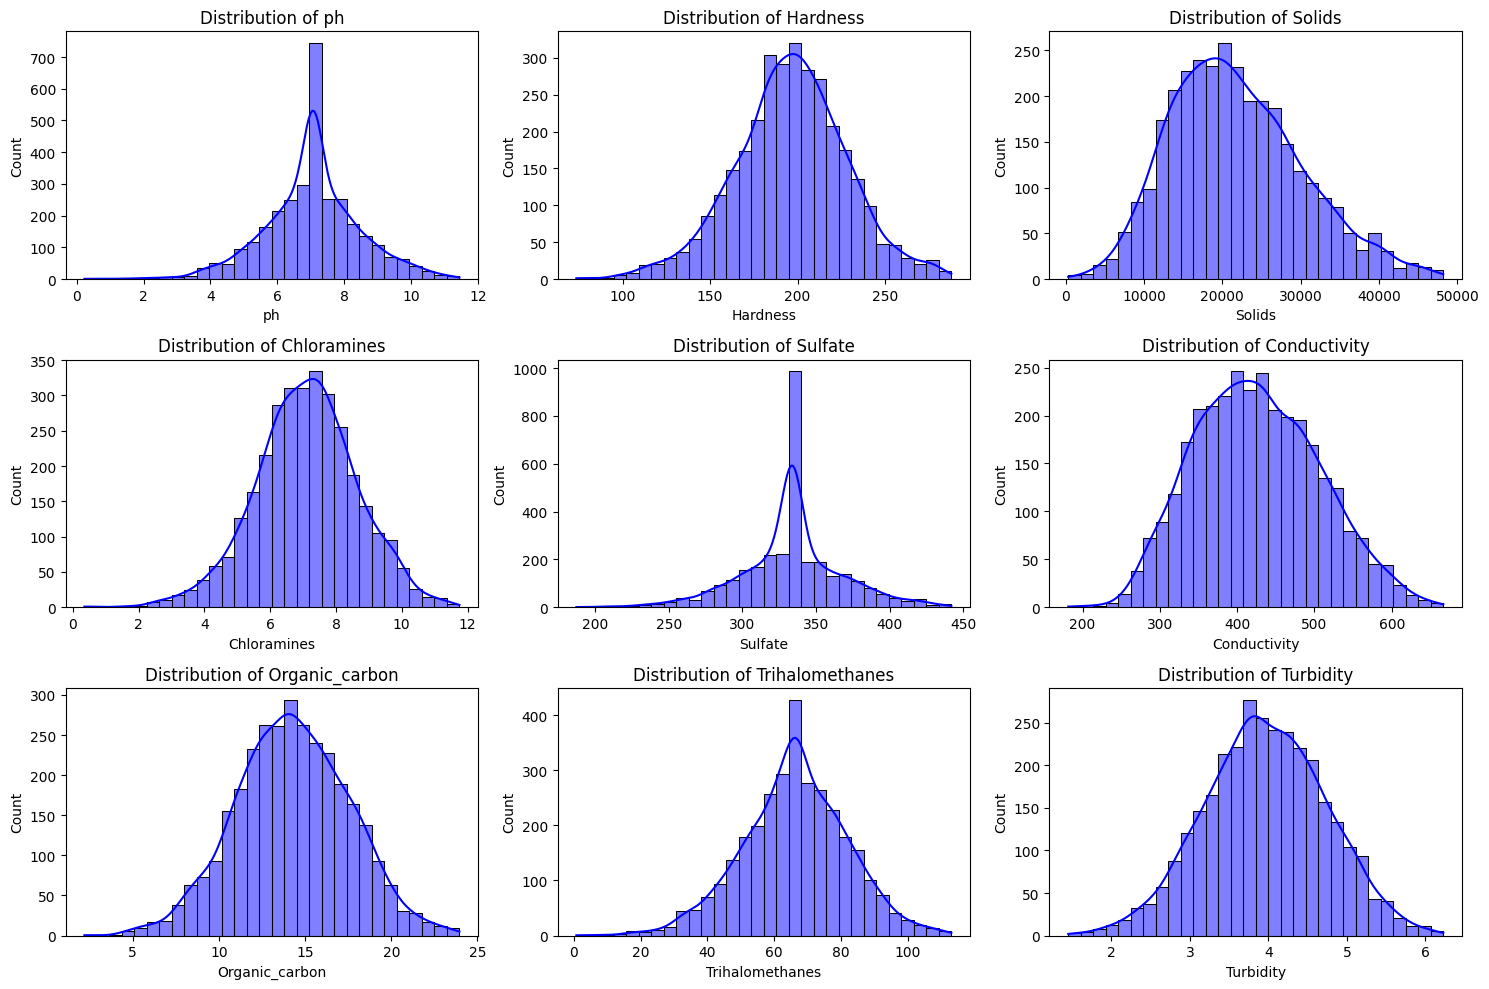

In [259]:
# Plot distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

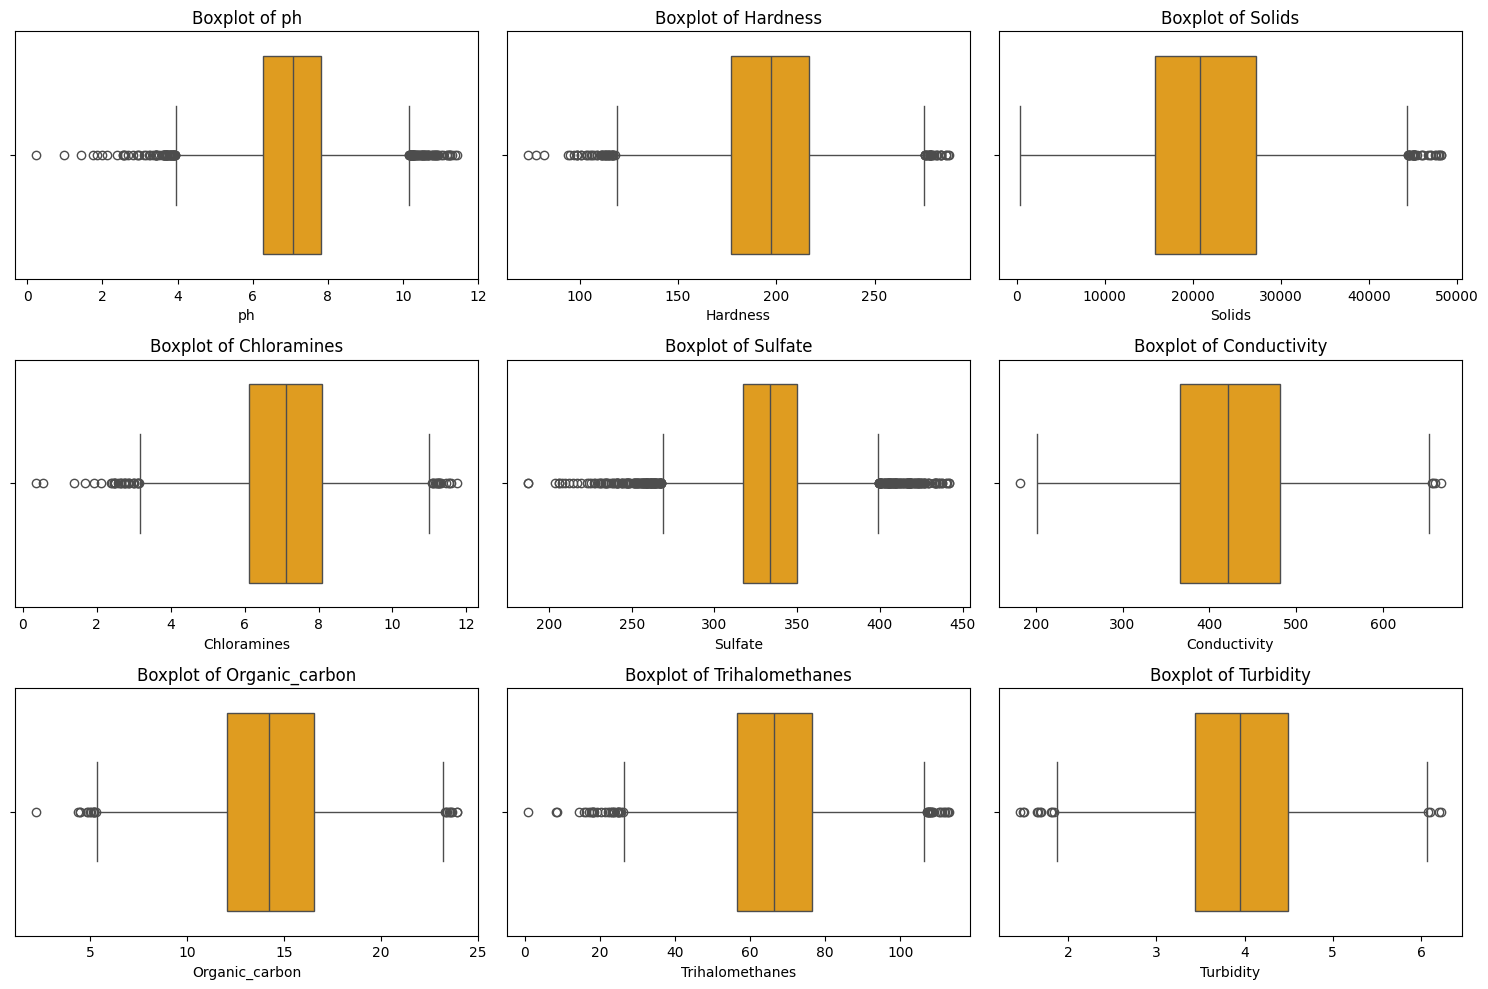

In [179]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


<Axes: xlabel='Potability', ylabel='count'>

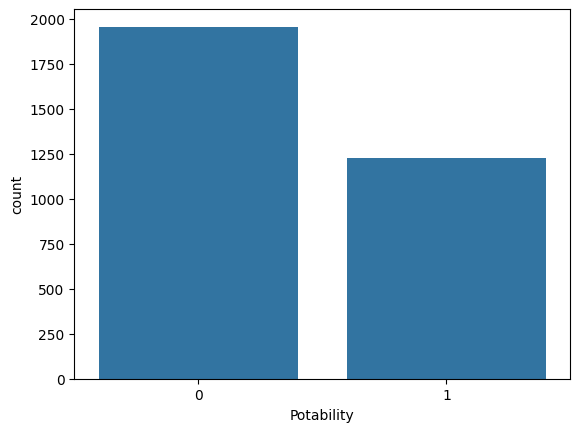

In [180]:
sns.countplot(x='Potability',data = data)

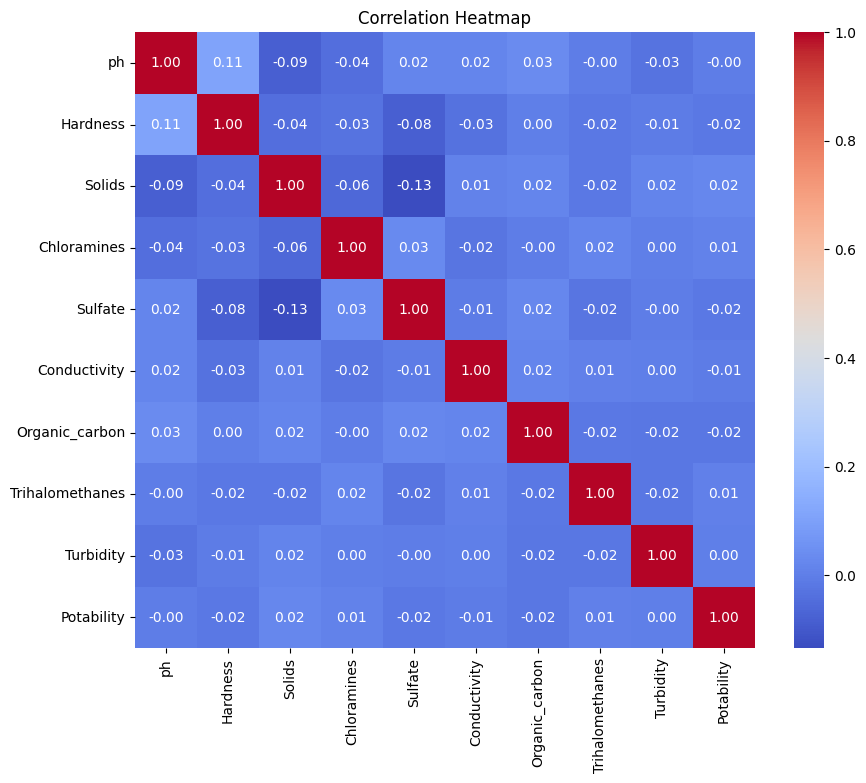

In [181]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [260]:
from imblearn.over_sampling import SMOTE

X, y = data_scaled.drop('Potability', axis=1), data_scaled['Potability']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape


((3910, 9), (3910,))

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [267]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [268]:
results = []

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

Training Random Forest...
Training SVC...
Training Decision Tree...
Training KNN...
Training XGBoost...


In [269]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Random Forest  0.694373   0.720222  0.653266  0.685112  0.779375
1            SVC  0.616368   0.617225  0.648241  0.632353  0.663153
2  Decision Tree  0.563939   0.567059  0.605528  0.585662  0.563180
3            KNN  0.640665   0.625806  0.731156  0.674392  0.695542
4        XGBoost  0.647059   0.658031  0.638191  0.647959  0.715583


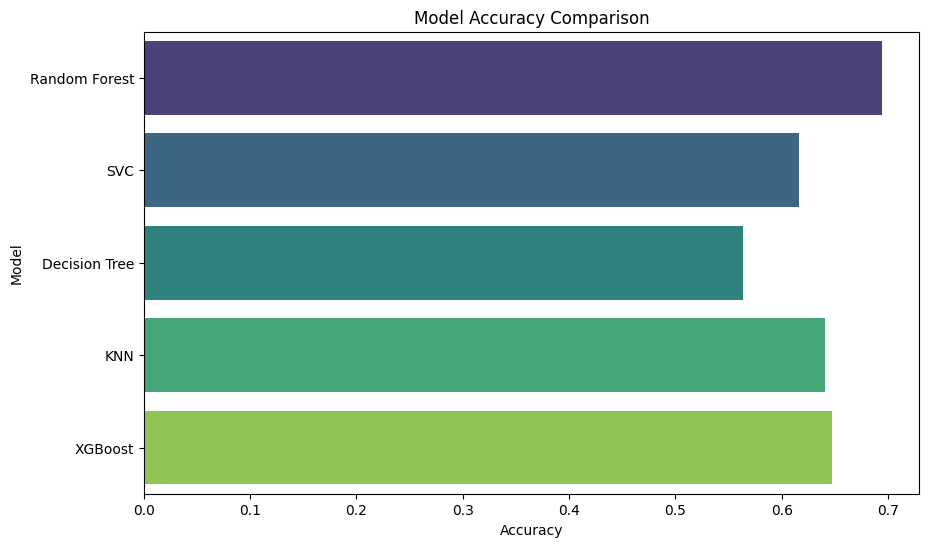

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()
